Introduction to regression with neural networks

In [28]:
import matplotlib.pyplot as plt
import tensorflow as tf 
import numpy as np 
import sklearn as sk
print(tf.__version__)

2.9.2


what are regression problems?
- this generally involves predicting numbers 
- generally predicting
- in a neural network regression we are generally going to be modeling and predicting teh relationships bewteent eh dependent vaiables and independent variables (set number (data)) 

- we generally need inputs and outputs 
the input will be the independent variables that are known  
we need to  encode the independent variabbles into a neumerically encoded tensor
- often an algorithms that we feed the input data into is gnenrally already made 


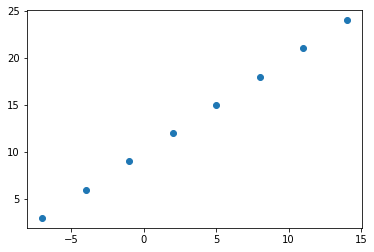

In [29]:
# first we will create the featuers 
X = np.array([-7.0, - 4.0, -1.0, 2.0, 5.0, 8.0, 11.0, 14.0])
# creating lables (dependent variables)
y = np.array([3.0, 6.0, 9.0, 12.0, 15.0, 18.0, 21.0, 24.0])

# visualisation of this data isiong a scatter plot
plt.scatter(X,y)

In [30]:
# the relationship seen :
X + 10, y== X+10

(array([ 3.,  6.,  9., 12., 15., 18., 21., 24.]),
 array([ True,  True,  True,  True,  True,  True,  True,  True]))

input and output shapes of the model

In [31]:
# lets create a demo tensor for out housing problem 
house_info = tf.constant(["bedroom", "bathroom", "garage"])
house_price = tf.constant([939700])
house_info, house_price

(<tf.Tensor: shape=(3,), dtype=string, numpy=array([b'bedroom', b'bathroom', b'garage'], dtype=object)>,
 <tf.Tensor: shape=(1,), dtype=int32, numpy=array([939700], dtype=int32)>)

notice the input shape is 3 and the output shape is 1 


In [32]:
input_shape = X.shape
output_shape = y.shape

input_shape, output_shape 
# notice that the output is 8 and 8 because there are correlated with 8 differnet inputs 

((8,), (8,))

In [33]:
X[0], y[0]
# notcie that we are using X 0 to preduct Y 0 
#so we want to use one input feature to predct one output feature 
# we want to build a model that takes one X value to predicting one y value 

(-7.0, 3.0)

lets turn out numpy arrays into tensors


In [34]:
X = tf.cast(tf.constant(X), dtype = tf.float32)
y = tf.cast(tf.constant(y), dtype = tf.float32)

X, y



(<tf.Tensor: shape=(8,), dtype=float32, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.], dtype=float32)>,
 <tf.Tensor: shape=(8,), dtype=float32, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.], dtype=float32)>)

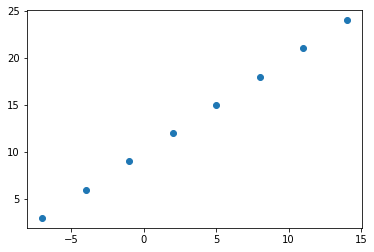

In [35]:
plt.scatter(X,y)

Steps in modeling 
- creating a model where we are defining the nput, output and hidden laters of a deep earning model 
- copiling  amodel and deifning the loss function(a function that tells out model how wrong out model is )
- the optimizer(tells out model how to improve our pattern)
- fitting a model- letting the model try and dind patterns between X and y (features and lables)



In [36]:
# first we need to set the seed 
X = tf.cast(tf.constant(X), dtype = tf.float32)
y = tf.cast(tf.constant(y), dtype = tf.float32)

X, y

tf.random.set_seed(42)
# lets create a model using teh sequenctial API
model= tf.keras.Sequential([ #groups a linear stack of layers into a tf.keras.Model.
    tf.keras.layers.Dense(1)
    ]) # this is basically saying that we want to generate a model from keras 
# now we want to compule the model 
model.compile(loss=tf.keras.losses.mae, # mae measn mean abouslue error, which is a measure of error between paired observations expressing the same phenomenon, compairson between preducted vs observed  )- 
               optimizer=tf.keras.optimizers.SGD(),
               metrics=["mae"])
# now we want to fit the model 
with tf.device('/cpu:0'): model.fit(tf.expand_dims(X, axis=-1), y, epochs=5) # we need to use the with cup or the kernal will crash
# epochs refers to the number of runs 


Epoch 1/5
1/1 [==============================] - 0s 183ms/step - loss: 11.5048 - mae: 11.5048
Epoch 2/5
1/1 [==============================] - 0s 3ms/step - loss: 11.3723 - mae: 11.3723
Epoch 3/5
1/1 [==============================] - 0s 3ms/step - loss: 11.2398 - mae: 11.2398
Epoch 4/5
1/1 [==============================] - 0s 3ms/step - loss: 11.1073 - mae: 11.1073
Epoch 5/5
1/1 [==============================] - 0s 3ms/step - loss: 10.9748 - mae: 10.9748


2022-06-30 14:28:30.223525: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


the tf.keras.losses.MAE function is beased on teh application of the loss function withwhich easure sthe mean (abs(y_true  -y_pred), axis = -1).
we are calculating teh differnce bteween teh f=true value and the preducted value and getting the absoliuete value of themse 2 and generating a mean of that laong a specifc axis
on average how wrong are our preductions 
SGD - this is stochastic gradient descent which is used to optimize, so that we are using stochastic approximation for gradient descent optimization and generates preductive vlues to fill in data 

there are multiple ways to add layers to our model in tensorflow
we are able to use either:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1), 
])

or we can use the term:
model .add(tf.keras.layers.Dense(1)) where 1 is the number of layers 

In [37]:
# now we want to try and predict using using the model 
y_pred = model.predict([17.0])
y_pred
# our model realizes that there is a differnce of about + 11 in the y values so thus it is going to predict an addition of about 12 but this isnt quite accurate 

1/1 [==============================] - 0s 30ms/step


2022-06-30 14:28:30.344098: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


array([[12.716021]], dtype=float32)

In order to improve the model we need to:
- by adding more layers to the
- within each of teh hidden laeer we can change the actiavtion function of each layer 
- we could change the ptimization function or the lernaing rate of the optimization function
- when we are fitting the model we might increase the number of epochs which will allow the model to run more examples to learn from.


In tensorflow ther ear e2 differnet models we are able to use for generating predictions
- the smaller models use the SGD where as the larger models have more layers 
- the number of neurons in each layer is increased in larger models 
- larger models also use the Adam optimizer with an lr (learning rate) the higher the learning rate the more that the optimizer is pushig the model to learn, the lower the learning rate, teh smaller the steps the optimizer tells the model to take to improve 
- there is also a differnce in the subset in the smaller model but in the larger model uses X_train_full and y_train_full


In [38]:
# lets see if we can increase our current model by increaseing teh epochs to 100 
tf.random.set_seed(42)
# lets create a model using teh sequenctial API
model= tf.keras.Sequential([ #groups a linear stack of layers into a tf.keras.Model.
    tf.keras.layers.Dense(1)
    ]) # this is basically saying that we want to generate a model from keras 
# now we want to compule the model 
model.compile(loss=tf.keras.losses.mae, # mae measn mean abouslue error, which is a measure of error between paired observations expressing the same phenomenon, compairson between preducted vs observed  )- 
               optimizer=tf.keras.optimizers.SGD(),
               metrics=["mae"])
# now we want to fit the model 
with tf.device('/cpu:0'): model.fit(tf.expand_dims(X, axis=-1), y, epochs=100) # we need to use the with cup or the kernal will crash
# epochs refers to the number of runs 

Epoch 1/100


2022-06-30 14:28:30.534899: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


1/1 [==============================] - 0s 143ms/step - loss: 11.5048 - mae: 11.5048
Epoch 2/100
1/1 [==============================] - 0s 3ms/step - loss: 11.3723 - mae: 11.3723
Epoch 3/100
1/1 [==============================] - 0s 3ms/step - loss: 11.2398 - mae: 11.2398
Epoch 4/100
1/1 [==============================] - 0s 4ms/step - loss: 11.1073 - mae: 11.1073
Epoch 5/100
1/1 [==============================] - 0s 3ms/step - loss: 10.9748 - mae: 10.9748
Epoch 6/100
1/1 [==============================] - 0s 4ms/step - loss: 10.8423 - mae: 10.8423
Epoch 7/100
1/1 [==============================] - 0s 3ms/step - loss: 10.7098 - mae: 10.7098
Epoch 8/100
1/1 [==============================] - 0s 3ms/step - loss: 10.5773 - mae: 10.5773
Epoch 9/100
1/1 [==============================] - 0s 3ms/step - loss: 10.4448 - mae: 10.4448
Epoch 10/100
1/1 [==============================] - 0s 4ms/step - loss: 10.3123 - mae: 10.3123
Epoch 11/100
1/1 [==============================] - 0s 3ms/step - los

In [39]:
X ,y

(<tf.Tensor: shape=(8,), dtype=float32, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.], dtype=float32)>,
 <tf.Tensor: shape=(8,), dtype=float32, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.], dtype=float32)>)

In [40]:
# now lets predict again to see if the prediction has improved 
model.predict([17.0])

1/1 [==============================] - 0s 30ms/step


2022-06-30 14:28:31.142259: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


array([[30.158512]], dtype=float32)

now lets try and reqrite the code so that we are going to optimize with the addition of more code that will help improve the accuracy of the preduction
- lets try and add another layer  

In [41]:
# lets see if we can increase our current model by increaseing teh epochs to 100 
tf.random.set_seed(42)
# lets create a model using teh sequenctial API
model= tf.keras.Sequential([ #groups a linear stack of layers into a tf.keras.Model.
    tf.keras.layers.Dense(2) # now we have 2 hidden layers of neurons 
    ]) # this is basically saying that we want to generate a model from keras 
# now we want to compule the model 
model.compile(loss=tf.keras.losses.mae, # mae measn mean abouslue error, which is a measure of error between paired observations expressing the same phenomenon, compairson between preducted vs observed  )- 
               optimizer=tf.keras.optimizers.SGD(),
               metrics=["mae"])
# now we want to fit the model 
with tf.device('/cpu:0'): model.fit(tf.expand_dims(X, axis=-1), y, epochs=100) # we need to use the with cup or the kernal will crash
# epochs refers to the number of runs 

Epoch 1/100


2022-06-30 14:28:31.326475: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


1/1 [==============================] - 0s 142ms/step - loss: 12.9775 - mae: 12.9775
Epoch 2/100
1/1 [==============================] - 0s 3ms/step - loss: 12.9112 - mae: 12.9112
Epoch 3/100
1/1 [==============================] - 0s 3ms/step - loss: 12.8450 - mae: 12.8450
Epoch 4/100
1/1 [==============================] - 0s 3ms/step - loss: 12.7787 - mae: 12.7787
Epoch 5/100
1/1 [==============================] - 0s 3ms/step - loss: 12.7125 - mae: 12.7125
Epoch 6/100
1/1 [==============================] - 0s 3ms/step - loss: 12.6462 - mae: 12.6462
Epoch 7/100
1/1 [==============================] - 0s 3ms/step - loss: 12.5800 - mae: 12.5800
Epoch 8/100
1/1 [==============================] - 0s 3ms/step - loss: 12.5137 - mae: 12.5137
Epoch 9/100
1/1 [==============================] - 0s 3ms/step - loss: 12.4475 - mae: 12.4475
Epoch 10/100
1/1 [==============================] - 0s 3ms/step - loss: 12.3812 - mae: 12.3812
Epoch 11/100
1/1 [==============================] - 0s 3ms/step - los

# Evaluating a model 
in practice a typical workflow youll go through when building neural networks:
- build a model
- fit it 
- evaluate it 
- tweak a model 
- fit it 
- evaluate it ... and repeate until we have met the desired outcome :)

when it comes to evaluation of out models we want to visualise our output with the desired output.
Generally we want to plot our data. this can go into the optimization of hyperparameters so that the predictions are as accurate across different input parameters for X
 


In [42]:
# lets make a bigger data set 
X = tf.range(-100,100,4)
X

<tf.Tensor: shape=(50,), dtype=int32, numpy=
array([-100,  -96,  -92,  -88,  -84,  -80,  -76,  -72,  -68,  -64,  -60,
        -56,  -52,  -48,  -44,  -40,  -36,  -32,  -28,  -24,  -20,  -16,
        -12,   -8,   -4,    0,    4,    8,   12,   16,   20,   24,   28,
         32,   36,   40,   44,   48,   52,   56,   60,   64,   68,   72,
         76,   80,   84,   88,   92,   96], dtype=int32)>

In [43]:
# lets make labes for the data set 
# we watnt eh pattern to learn this relationship that y = X +10
y = X+10
y 

<tf.Tensor: shape=(50,), dtype=int32, numpy=
array([-90, -86, -82, -78, -74, -70, -66, -62, -58, -54, -50, -46, -42,
       -38, -34, -30, -26, -22, -18, -14, -10,  -6,  -2,   2,   6,  10,
        14,  18,  22,  26,  30,  34,  38,  42,  46,  50,  54,  58,  62,
        66,  70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>

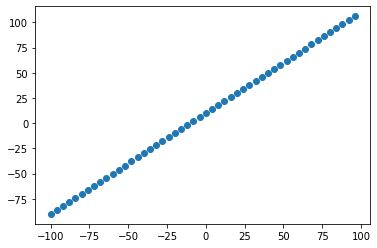

In [44]:
# now we want to visualise the data 
import matplotlib.pyplot as plt   
plt.scatter(X,y)

In [45]:
# before we visualise the training of the data we need to look into the theory of the 3 sets 
# the 3 sets refers to brekaing up the data into 3 differnet sets (training set, validation set, test set)
# you generally have a training set of data (70-80% of the data we have avalible ) - this is where we would tweak the model
# the vaidation set- is wher ewe are going to  


# 3 sets theory 
- Generally in machine learning we have 3 sets of data that we utilise in the model
- a training set where the model learns from this data which accounts for about 70-80% if teh ttal data you have avalible 
- a validation set -  the model gets tuned on this data, which is typically 10-15% of the data avalible
- there is also the test set which is typically 10-15% of the total data avalible  


In [46]:
# lets check the length of how many samples we have 
len(X)
# we shoul d genrally have a minimum of 100 in general for deep learning 

50

In [47]:
# lets split the data into training and test sets  
X_train  = X [:40] # this is 80% of the data 
X_test = X[40:] # this is the last 10
 
y_train = y[:40] # this is the first 40 that are dedicated to learning 
y_test = y [40:] # this the test set that contains teh last 10 values of the data set
len(X_train), len(X_test), len(y_train), len(y_test)


(40, 10, 40, 10)

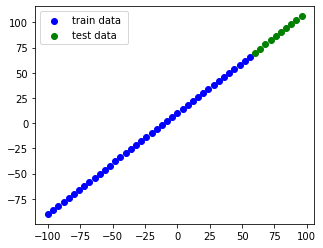

In [48]:
# now we want to visualise the data in the test sets 
plt.figure(figsize = (5,4)) # setting the figure size 
# we wnat to plot the training data in blue

plt.scatter(X_train, y_train, c= "b", label = "train data ") #plotting the training data in blue 
plt.scatter(X_test, y_test, c= "g", label= "test data ") #plotting the test data in green

plt.legend();

# Generating a model 

In [49]:
# now lets generate a model that is able to predict 
# lets see if we can increase our current model by increaseing teh epochs to 100 
tf.random.set_seed(42)
# lets create a model using teh sequenctial API
model= tf.keras.Sequential([ #groups a linear stack of layers into a tf.keras.Model.
    tf.keras.layers.Dense(1)# now we have 2 hidden layers of neurons 
    ]) # this is basically saying that we want to generate a model from keras 
# now we want to compule the model 
model.compile(loss=tf.keras.losses.mae, # mae measn mean abouslue error, which is a measure of error between paired observations expressing the same phenomenon, compairson between preducted vs observed  )- 
               optimizer=tf.keras.optimizers.SGD(),
               metrics=["mae"])
# now we want to fit the model 
#with tf.device('/cpu:0'): model.fit(tf.expand_dims(X_train, axis=-1), y_train, epochs=100) # we need to use the with cup or the kernal will crash
# epochs refers to the number of runs 

In [50]:
# now lets generate a model that is able to predict 
# lets see if we can increase our current model by increaseing teh epochs to 100 
tf.random.set_seed(42)
# lets create a model using teh sequenctial API
with tf.device('/cpu:0'): model= tf.keras.Sequential([ #groups a linear stack of layers into a tf.keras.Model.
    tf.keras.layers.Dense(1, input_shape = [1])# now we have 2 hidden layers of neurons 
    ]) # this is basically saying that we want to generate a model from keras 
# now we want to compule the model 
model.compile(loss=tf.keras.losses.mae, # mae measn mean abouslue error, which is a measure of error between paired observations expressing the same phenomenon, compairson between preducted vs observed  )- 
               optimizer=tf.keras.optimizers.SGD(),
               metrics=["mae"])
# now we want to fit the model 
# epochs refers to the number of runs 


In [51]:
model.summary()

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_10 (Dense)            (None, 1)                 2         
                                                                 
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________
